<a href="https://colab.research.google.com/github/adi1102/LearnGit/blob/master/Assignment%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 10** - Regression of f(x) = sin(x) + cos(3x) using **Keras**

Importing libraries and modules 

In [22]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import keras
import sklearn
import time
import random

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific modules

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Activation

**Visualizing the graph of the function with noisy random samples** 

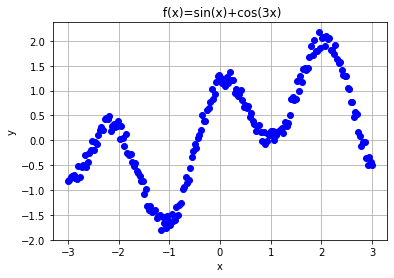

In [23]:
np.random.seed(400)
x = np.linspace(-3, 3, 200)
# x= np.arange(0, math.pi*2*2, 0.1)
# noise = np.random.normal(0,0.02)
noise = 0.00070*np.asarray(random.sample(range(0,500),200)) 
y = np.sin(x)+np.cos(3*x)+noise   # function with added noise 
    
# print(x,y)

# Visualizing  the graph -
plt.plot(x, y,linestyle='',marker = "o", color = 'blue')
plt.title(' f(x)=sin(x)+cos(3x)')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

**Split the data into training and testing set** 

In [24]:
# Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


**Building the model, compiling and predicting the test values  and then Visualizing the predictions at every iteration**

0   1.4617341819300365  t:  3.0679528099999516


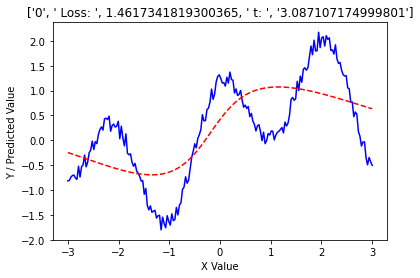

1   1.5104037669405446  t:  5.92280962399991


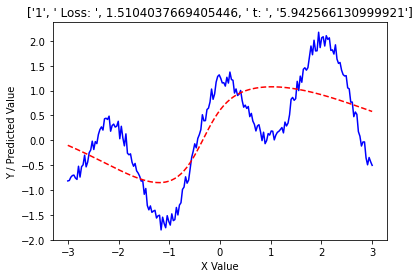

2   1.5400727056724202  t:  8.383499685999823


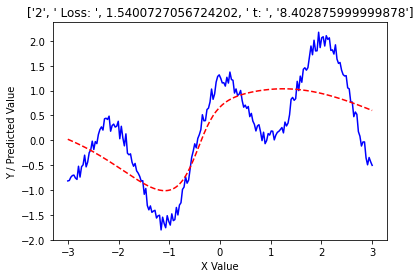

3   1.5757200151456732  t:  10.716153674999987


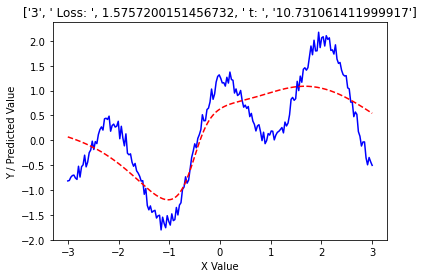

4   1.6283211439359433  t:  13.005505462999963


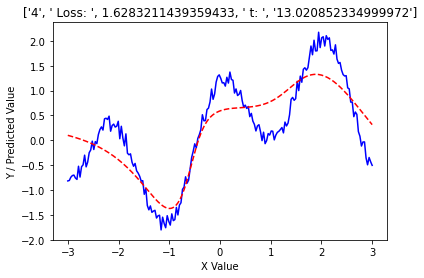

5   1.7006772809807096  t:  15.856730194999955


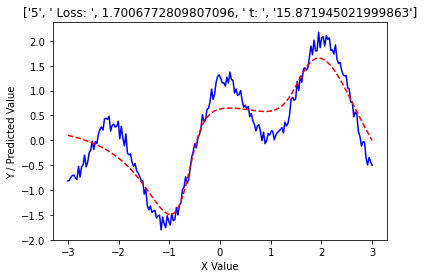

6   1.7606202298668614  t:  18.71850842699996


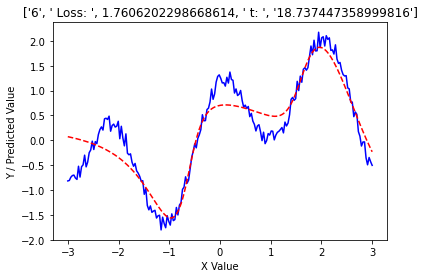

7   1.8010048956282234  t:  21.57985348499983


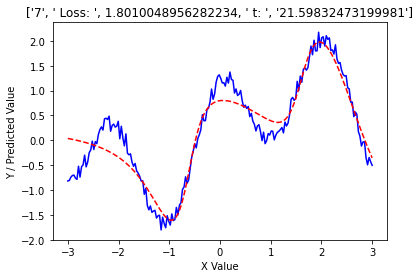

8   1.8310548518247178  t:  23.940063648999967


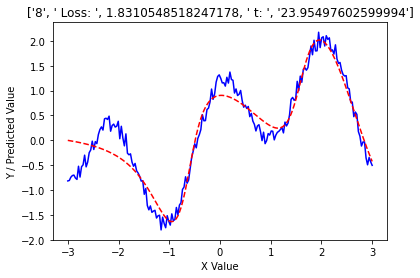

9   1.8526417692032322  t:  26.787510252999937


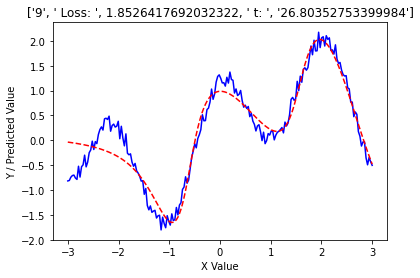

10   1.8646454938764379  t:  29.644910005999918


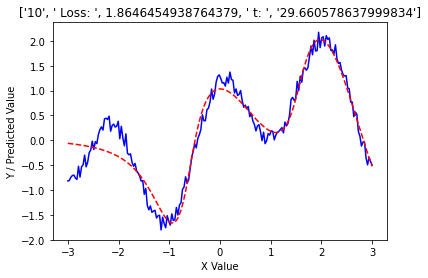

11   1.8708375670667483  t:  32.51475023499984


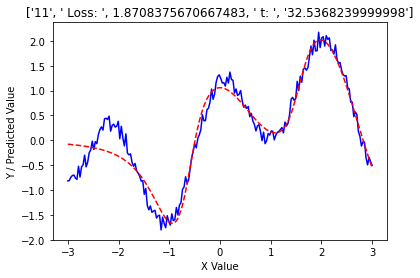

12   1.8746061264839002  t:  35.78944612499981


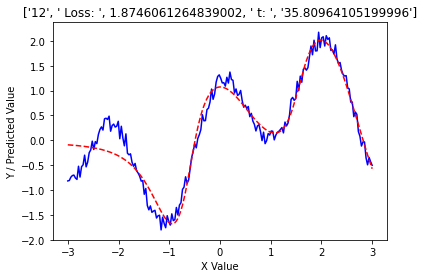

13   1.877427983164314  t:  38.65120635199992


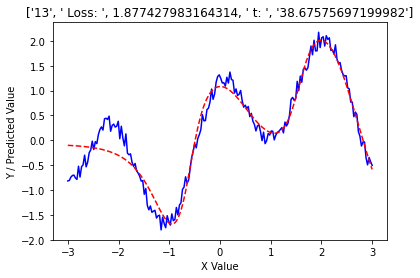

14   1.8798363902155837  t:  41.05891357199994


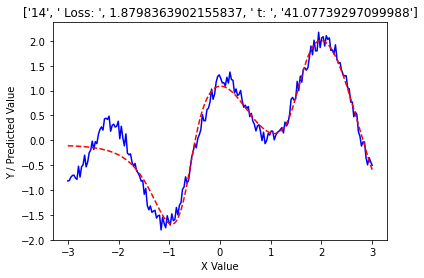

15   1.8820499170807612  t:  43.36153344399986


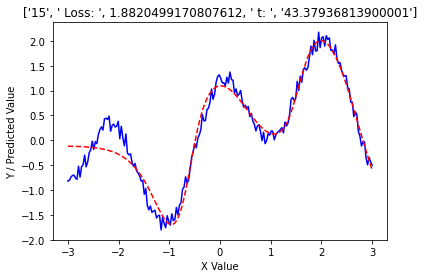

16   1.884161841952052  t:  45.632343882999976


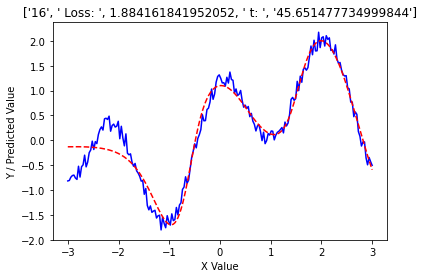

17   1.88611753084144  t:  48.503155892999985


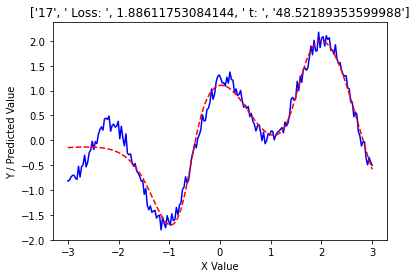

18   1.8875630284396423  t:  51.36009439099985


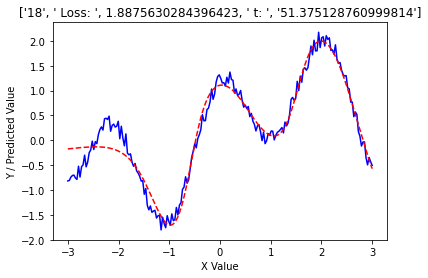

19   1.8881822755110915  t:  53.71049492499992


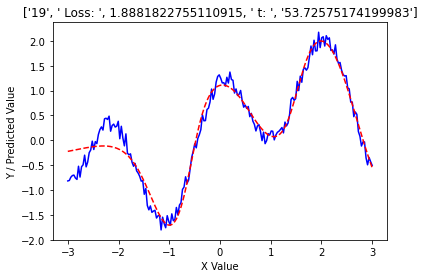

20   1.8901400273325162  t:  56.54728615199997


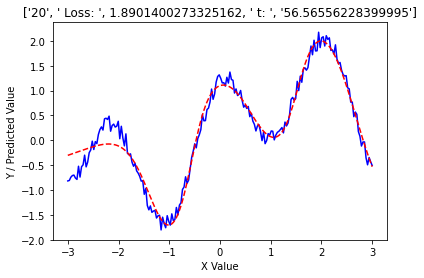

21   1.8964206924427591  t:  59.39292546699994


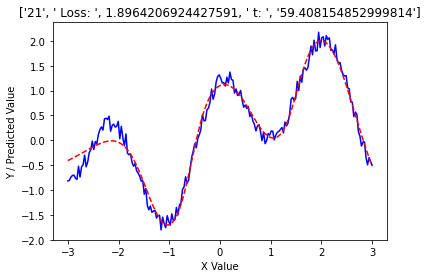

22   1.9056228617000213  t:  61.73015864499985


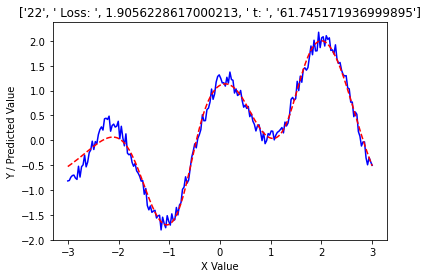

23   1.915179408695792  t:  64.57849713099995


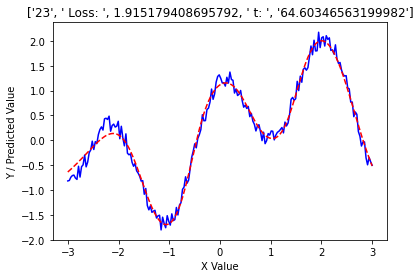

24   1.9233509872089263  t:  67.45466483999985


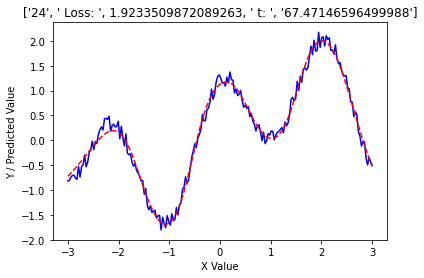

25   1.9295477103687522  t:  69.926374033


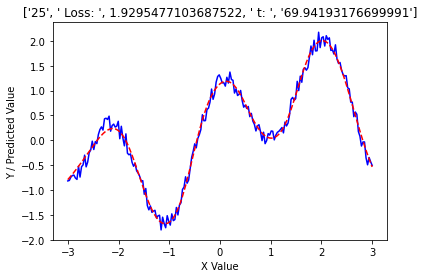

26   1.9339546251876694  t:  72.226823836


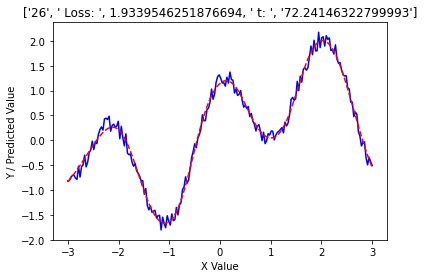

27   1.9370007679986099  t:  74.55559417199993


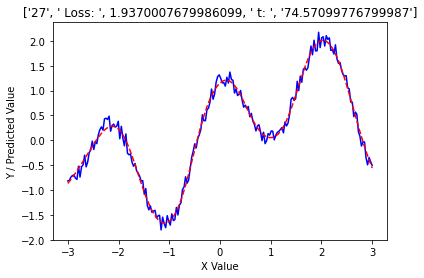

28   1.9390879648861776  t:  77.40268922899986


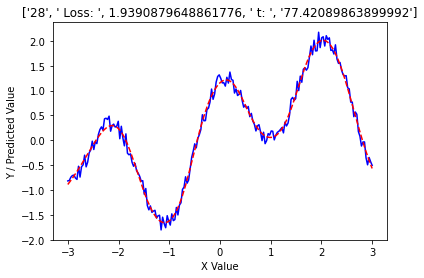

29   1.9405142707222938  t:  79.77419481599986


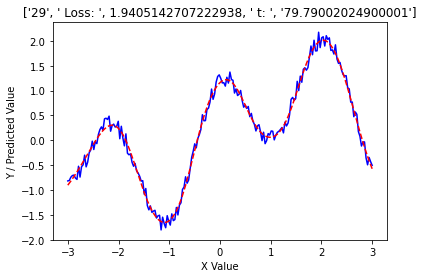

30   1.9414872942661576  t:  82.66567739699985


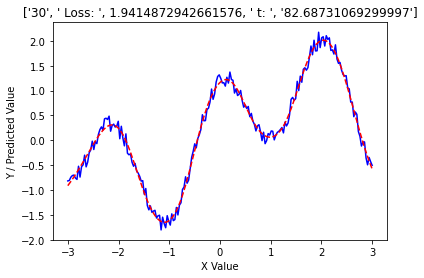

31   1.942158777039771  t:  85.20407259699982


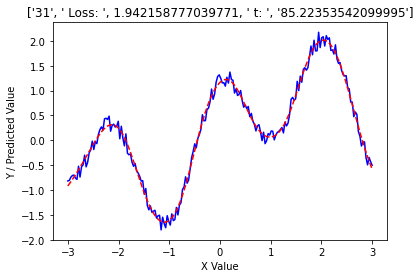

32   1.9426176601144063  t:  87.5737903449999


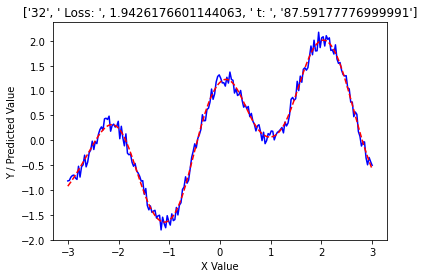

33   1.9429353425749156  t:  90.45268672399993


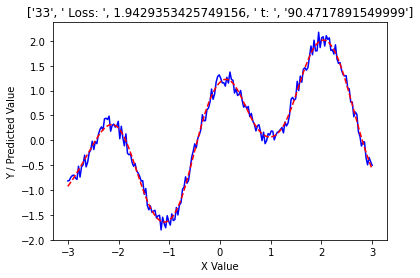

34   1.9431547820127972  t:  93.32028521099983


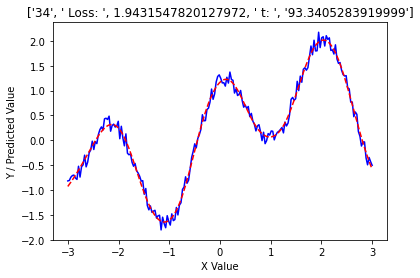

35   1.9433070634796281  t:  96.19414418199995


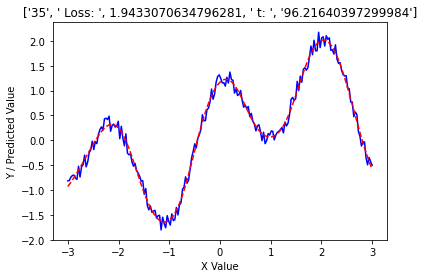

36   1.9434088535991596  t:  99.1190582239999


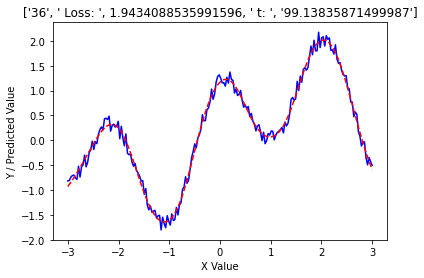

37   1.943479841705152  t:  101.98929436099979


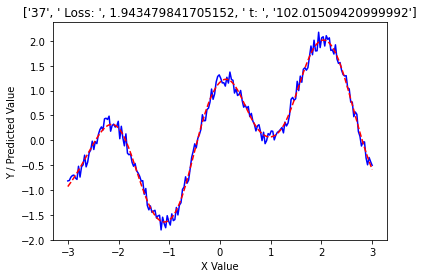

38   1.9435192807199593  t:  104.86451403599995


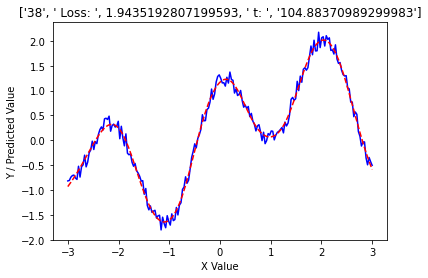

39   1.9435541557625926  t:  107.73767686699989


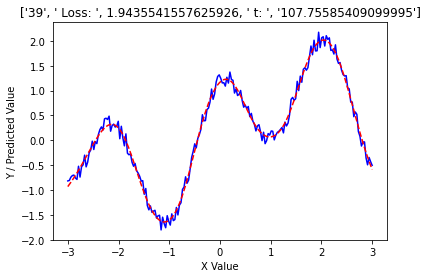

<Figure size 432x288 with 0 Axes>

In [25]:
model = Sequential([Dense(10, input_shape=(1,)), Activation('tanh'), Dense(3),Activation('tanh'),Dense(1)])

model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])

t1 = time.perf_counter()
for i in range(40):
    model.fit(x, y, epochs=1000, batch_size=len(x), verbose=0)
    predictions = model.predict(x)
    print (i," ", np.mean(np.square(predictions - y))," t: ", time.perf_counter()-t1)

    # plt.hold(True)
    # Visualizing the predictions at each iteration - 
    plt.plot(x, y,'b', x, predictions, 'r--')
    # plt.hold(True)
    plt.ylabel('Y / Predicted Value')
    plt.xlabel('X Value')
    plt.title([str(i)," Loss: ",np.mean(np.square(predictions - y))," t: ", str(time.perf_counter()-t1)])
    plt.pause(0.001)
plt.savefig("fig2.png")
plt.show()

**The training RMSE and the test RMSE values**

In [26]:
pred_train= model.predict(X_train)
print("Training RMSE value :",np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print("Testing RMSE value :",np.sqrt(mean_squared_error(y_test,pred))) 

Training RMSE value : 0.1033908001207499
Testing RMSE value : 0.09699809155095315
